In [38]:
import pandas as pd
from sklearn.datasets import  load_iris
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = load_iris()

In [6]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris = pd.DataFrame(data.data,columns = data.feature_names)

In [9]:
iris['target'] =data.target

In [11]:
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
all_species = data.target_names
all_species

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
iris['Species'] = iris.target.apply(lambda x: all_species[x] )

In [20]:
iris.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
92,5.8,2.6,4.0,1.2,1,versicolor
11,4.8,3.4,1.6,0.2,0,setosa
71,6.1,2.8,4.0,1.3,1,versicolor


In [22]:
independend_var = iris.drop(['target','Species'],axis = 'columns')
dependend_var = iris.target

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independend_var,dependend_var,test_size = .3)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model = RandomForestClassifier(n_estimators= 80)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80)

In [72]:
model.score(X_test,y_test)

0.9555555555555556

In [73]:
y_predicted = model.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

<Axes: >

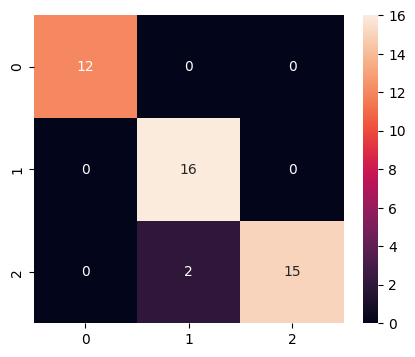

In [75]:
plt.figure(figsize = (5,4))
sns.heatmap(cm,annot = True )